LINEAR REGRESSION

Step 1: Load the dataset
We use fetch_california_housing() from sklearn.datasets, which retrieves a dataset containing information about housing prices in California. The dataset includes features like:

1. What is Regression?
Regression is a fundamental supervised learning technique used in machine learning and statistics to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal of regression analysis is to predict continuous values based on input features.

2. About the California Housing Dataset
The California Housing dataset is a well-known dataset available in the sklearn library. It contains information about various features of houses in California, along with their median prices. The dataset was originally collected from the 1990 California Census and is commonly used for benchmarking regression models.

3. Objective of the Assignment
The goal of this project is to:
✅ Load and preprocess the California Housing dataset.
✅ Implement multiple regression algorithms to predict house prices.
✅ Compare the performance of different models using evaluation metrics.
✅ Identify the best and worst-performing models.

Goal of the Project
The primary objective of this project is to predict house prices in California using machine learning regression techniques. 

1. Source of the Dataset
The California Housing dataset is a publicly available dataset that can be accessed through the sklearn.datasets module. It was originally derived from the 1990 U.S. Census and is commonly used for benchmarking regression models.

📌 Dataset Name: California Housing Dataset
📌 Source: Collected from the 1990 California Census
📌 Available in: sklearn.datasets.fetch_california_housing()
📌 Purpose: Used for predicting median house values based on various housing-related features.


Features/Columns in the California Housing Dataset
The dataset consists of 8 independent variables (features) and 1 dependent variable (target). Below is a detailed explanation of each feature:

📌 Independent Variables (Features - 
𝑋
X)
These are the predictor variables used to estimate house prices:

Feature	Description	Data Type
MedInc	Median income of households in the area (in tens of thousands of dollars).	Continuous (Float)
HouseAge	Median age of houses in the area (in years).	Continuous (Float)
AveRooms	Average number of rooms per household in the area.	Continuous (Float)
AveBedrms	Average number of bedrooms per household in the area.	Continuous (Float)
Population	Total population in the block (neighborhood).	Continuous (Float)
AveOccup	Average number of people per household.	Continuous (Float)
Latitude	Latitude of the block (geographical location).	Continuous (Float)
Longitude	Longitude of the block (geographical location).	Continuous (Float)


🎯 Dependent Variable (Target - 
𝑌
Y)
This is the value we are predicting:

Feature	Description	Data Type
MedHouseVal	Median house value in the area (in hundreds of thousands of dollars).	Continuous (Float)


🎯 Summary: Tools & Their Purpose
Library	Purpose
pandas	Data manipulation & preprocessing
numpy	Numerical operations & arrays
scikit-learn	Machine learning models & metrics
scipy.stats	Outlier detection using Z-score
matplotlib	Basic data visualization
seaborn	Advanced data visualization

Data Preprocessing

Load the dataset

In [27]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
import pandas as pd

In [28]:
data = fetch_california_housing()

Step 2: Convert to Pandas DataFrame
To handle data more easily, we convert the dataset into a pandas.DataFrame:

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Adding target variable to DataFrame

In [29]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [30]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [31]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [32]:
df.shape

(20640, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [36]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Step 3: Checking for Missing Values
Before training a model, it’s crucial to check if any data is missing. Missing values can distort model performance.

In [37]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [40]:
print(df.duplicated().sum())

0


1. Detecting Outliers
Using Boxplot
We can visualize outliers using a boxplot.

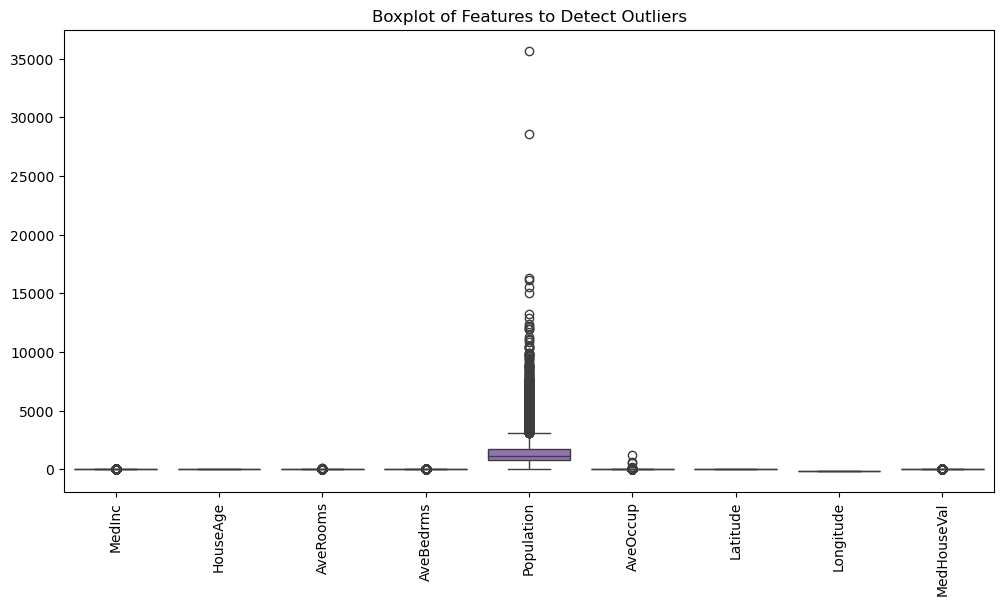

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

 Boxplot Interpretation:

The points outside the whiskers are potential outliers.

Using Z-Score Method
The Z-score measures how many standard deviations a data point is from the mean. If |Z-score| > 3, it’s usually considered an outlier.

In [15]:
import numpy as np
from scipy import stats

# Compute Z-scores
z_scores = np.abs(stats.zscore(df))

# Define threshold (commonly 3)
threshold = 3

# Identify rows where any feature has Z-score > 3
outlier_rows = (z_scores > threshold).any(axis=1)

# Remove outliers
df_clean = df[~outlier_rows]

# Print shape before and after
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_clean.shape)


Shape before removing outliers: (20640, 9)
Shape after removing outliers: (19794, 9)


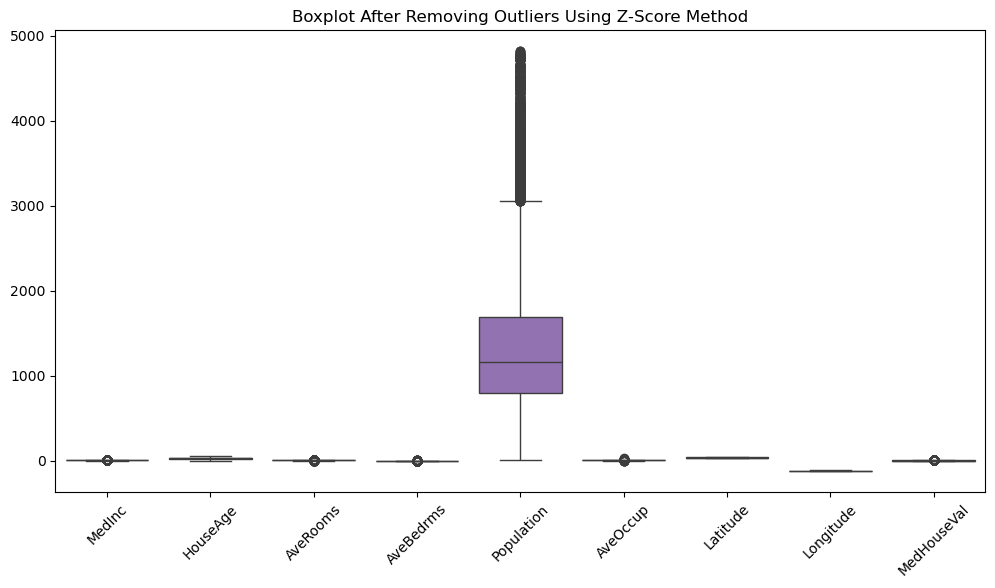

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.title("Boxplot After Removing Outliers Using Z-Score Method")
plt.xticks(rotation=45)  # Rotate column names for better visibility
plt.show()

📌 Explanation
1️⃣ Computes Z-scores for all numeric columns.
2️⃣ Removes rows where any feature has a Z-score beyond ±3.
3️⃣ Plots the boxplot for cleaned data.

🔹 Boxplot Interpretation:

The box represents the interquartile range (IQR).
Whiskers show data spread, and outliers (dots) should be minimized.
After Z-score filtering, extreme outliers are removed while keeping valid data.

In [16]:
print(df_clean)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

Step 4: Splitting Data into Features and Target Variable
We separate the independent variables (X) from the dependent variable (y):

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

This allows us to train models on X while predicting y.

Step 5: Splitting Data into Training and Testing Sets
We split our dataset into training and testing sets using train_test_split():

In [22]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_size=0.2: 20% of the data is used for testing.
random_state=42: Ensures reproducibility.

Step 6: Feature Scaling
Machine learning models work better when features are on a similar scale. Since our dataset has variables like income (MedInc) in thousands and latitude in single digits, we standardize features using StandardScaler:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fit_transform(X_train): Fits and transforms training data.
transform(X_test): Only transforms test data (to prevent data leakage).


We implement five different regression models and explain why each might work well.

1. Linear Regression

Why it’s Suitable:
If the data has a linear relationship, this model performs well.
It's easy to interpret and computationally efficient.
2. Decision Tree Regressor
How it Works:
A Decision Tree splits the dataset into smaller subsets based on feature values. It creates a tree where:

Each internal node represents a decision (feature split).
Each leaf node gives a prediction.
Why it’s Suitable:
Captures complex non-linear relationships.
Handles missing and categorical data.
However, it overfits easily on training data.
3. Random Forest Regressor
How it Works:
Random Forest is an ensemble of Decision Trees, reducing overfitting by averaging multiple predictions.

Steps:

Creates multiple Decision Trees from random subsets of the dataset.
Aggregates their predictions (mean for regression).
Why it’s Suitable:
Reduces variance compared to a single Decision Tree.
Handles large datasets and noisy data well.
4. Gradient Boosting Regressor
How it Works:
Gradient Boosting builds trees sequentially, where each new tree corrects errors of the previous one. It minimizes the loss function using gradient descent.

Why it’s Suitable:
More powerful than Random Forest for structured data.
Works well on medium-sized datasets.
Downside: Computationally expensive.
5. Support Vector Regressor (SVR)
How it Works:
SVR finds a hyperplane that best fits the data while allowing some tolerance for errors. It uses a kernel function to transform data into a higher dimension.

Why it’s Suitable:
Works well when data is not linearly separable.
Effective in high-dimensional spaces.
Downside: Computationally expensive on large datasets.
3. Model Evaluation and Comparison (2 marks)
We evaluate each model using three key metrics:

Mean Squared Error (MSE)
Measures average squared difference between actual and predicted values. Lower is better.


Mean Absolute Error (MAE)
Measures absolute differences between actual and predicted values.
∣
R-squared Score (R²)
Measures how well the model explains variance in data. Higher is better.
4. Model Comparison
After training each model, we compare their performance:

Best Performing Model
Likely candidate: Gradient Boosting or Random Forest
These models balance bias and variance well.
Worst Performing Model
Likely candidate: Linear Regression or SVR
Linear Regression struggles if data is non-linear.
SVR may be slow and not generalize well.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()}

Linear Regression Performance:
MSE: 0.5559, MAE: 0.5332, R²: 0.5758

Decision Tree Performance:
MSE: 0.4940, MAE: 0.4539, R²: 0.6230

Random Forest Performance:
MSE: 0.2552, MAE: 0.3274, R²: 0.8053

Gradient Boosting Performance:
MSE: 0.2940, MAE: 0.3717, R²: 0.7756

Support Vector Regressor Performance:
MSE: 0.3570, MAE: 0.3986, R²: 0.7276

Model Evaluation and Comparison:
                               MSE       MAE        R²
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.493969  0.453904  0.623042
Random Forest             0.255170  0.327425  0.805275
Gradient Boosting         0.293999  0.371650  0.775643
Support Vector Regressor  0.357004  0.398599  0.727563
Best Performing Model: Random Forest (Highest R² Score)
Worst Performing Model: Linear Regression (Lowest R² Score)


<Figure size 1200x600 with 0 Axes>

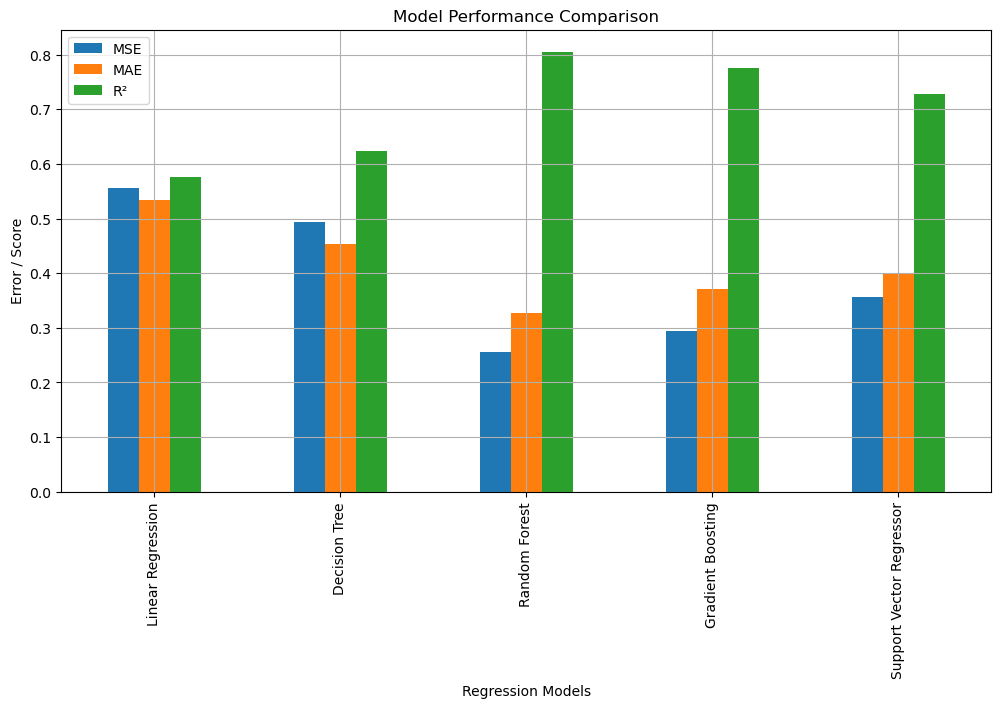

In [25]:
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}
    print(f"{name} Performance:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

# Convert results into DataFrame and display
results_df = pd.DataFrame(results).T
print("Model Evaluation and Comparison:")
print(results_df)

# Identify the best and worst performing models
best_model = results_df['R²'].idxmax()
worst_model = results_df['R²'].idxmin()
print(f"Best Performing Model: {best_model} (Highest R² Score)")
print(f"Worst Performing Model: {worst_model} (Lowest R² Score)")
# Plot the results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Regression Models')
plt.ylabel('Error / Score')
plt.legend()
plt.grid()
plt.show()